<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-[Chapter-05]-회귀" data-toc-modified-id="1.-[Chapter-05]-회귀-1">1. [Chapter 05] 회귀</a></span><ul class="toc-item"><li><span><a href="#1.9-회귀-실습---자전거-대여-수요-예측" data-toc-modified-id="1.9-회귀-실습---자전거-대여-수요-예측-1.1">1.9 회귀 실습 - 자전거 대여 수요 예측</a></span><ul class="toc-item"><li><span><a href="#1.9.1-데이터-클렌징-및-가공" data-toc-modified-id="1.9.1-데이터-클렌징-및-가공-1.1.1">1.9.1 데이터 클렌징 및 가공</a></span></li><li><span><a href="#1.9.2-로그-변환,-피처-인코딩과-모델-학습/예측/평가" data-toc-modified-id="1.9.2-로그-변환,-피처-인코딩과-모델-학습/예측/평가-1.1.2">1.9.2 로그 변환, 피처 인코딩과 모델 학습/예측/평가</a></span></li></ul></li><li><span><a href="#1.10-회귀-실습---캐글-주택-가격:-고급-회귀-기법" data-toc-modified-id="1.10-회귀-실습---캐글-주택-가격:-고급-회귀-기법-1.2">1.10 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법</a></span><ul class="toc-item"><li><span><a href="#1.10.1-선형-회귀-모델-학습/예측/평가" data-toc-modified-id="1.10.1-선형-회귀-모델-학습/예측/평가-1.2.1">1.10.1 선형 회귀 모델 학습/예측/평가</a></span></li><li><span><a href="#1.10.2-회귀-트리-모델-학습/예측/평가" data-toc-modified-id="1.10.2-회귀-트리-모델-학습/예측/평가-1.2.2">1.10.2 회귀 트리 모델 학습/예측/평가</a></span></li><li><span><a href="#1.10.3-회귀-모델의-예측-결과-혼합을-통한-최종-예측" data-toc-modified-id="1.10.3-회귀-모델의-예측-결과-혼합을-통한-최종-예측-1.2.3">1.10.3 회귀 모델의 예측 결과 혼합을 통한 최종 예측</a></span></li><li><span><a href="#1.10.4-스태킹-앙상블-모델을-통한-회귀-예측" data-toc-modified-id="1.10.4-스태킹-앙상블-모델을-통한-회귀-예측-1.2.4">1.10.4 스태킹 앙상블 모델을 통한 회귀 예측</a></span></li><li><span><a href="#1.10.5-최종-결과-제출" data-toc-modified-id="1.10.5-최종-결과-제출-1.2.5">1.10.5 최종 결과 제출</a></span></li></ul></li></ul></li></ul></div>

# 1. [Chapter 05] 회귀

## 1.9 회귀 실습 - 자전거 대여 수요 예측

- datetime


- season : 봄(1), 여름(2), 가을(3), 겨울(4)


- holiday : 주말을 제외한 휴일(1), 휴일이 아닌 날(0)


- workingday : 주중(1), 주말 및 휴일(0)


- weather : 맑음(1), 안개(2), 가벼운 눈/비(3), 심한 눈/비(4)


- temp : 온도(섭씨)


- atemp : 체감온도(섭씨)


- humidity : 상대습도


- windspeed : 풍속


- casual : 사전에 등록되지 않은 사용자가 대여한 횟수


- registered : 사전에 등록된 사용자가 대여한 횟수


- **count : 대여 횟수**

### 1.9.1 데이터 클렌징 및 가공

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./data/bike-sharing-demand/train.csv')
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
df['datetime'] = df['datetime'].apply(pd.to_datetime)

# datetime 타입에서 년, 월, 일, 시간 추출
df['year'] = df.datetime.apply(lambda x : x.year)
df['month'] = df.datetime.apply(lambda x : x.month)
df['day'] = df.datetime.apply(lambda x : x.day)
df['hour'] = df.datetime.apply(lambda x : x.hour)
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [4]:
# 불필요한 칼럼 삭제
df.drop(['datetime','casual','registered'], axis=1, inplace=True)

casual, registered 칼럼은 오히려 상관도가 높아 예측을 저해할 우려가 있으므로 삭제 (casual + registered = count)

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSLE 성능 평가 함수 생성
def rmsle(y, pred):
    log_y = np.log1p(y)     # log()나 mean_squared_log_error() 함수는 오버플로/언더플로 오류가 발생하기 쉬우므로 log1p() 이용
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) **2
    rmsle = np.sqrt(np.mean(squared_error))
    print('RMSLE: {:.3f}'.format(rmsle))

### 1.9.2 로그 변환, 피처 인코딩과 모델 학습/예측/평가

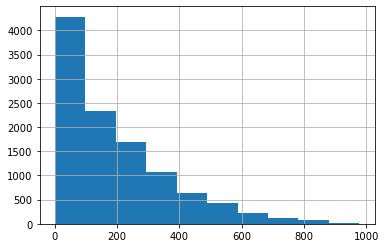

In [6]:
y_target = df['count']
X_features = df.drop(['count'], axis=1, inplace=False)

# Target 값의 분포 확인
y_target.hist()

Target 값이 왜곡되어 있으므로, 로그를 적용(**np.log1p**)해 변환

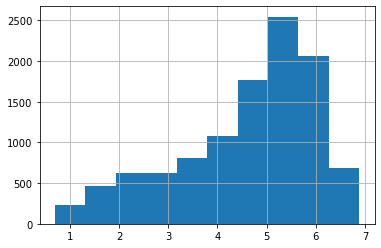

In [7]:
y_target_log = np.log1p(y_target)
y_target_log.hist()

**get_dummies()**를 이용해 year, month, day, hour, holiday, workingday, season, weather 칼럼에 원-핫 인코딩 적용

(선형 회귀에서는 숫자형 값에 크게 영향을 받기 때문)

In [8]:
X_features_ohe = pd.get_dummies(X_features, columns=['year','month','day','hour','holiday','workingday','season','weather'])

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso

X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y_target_log, test_size=0.3, random_state=0)

def get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=False):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    if is_expm1:
        y_test = np.expm1(y_test)
        pred = np.expm1(pred)     # 테스트 데이터의 Target 값과 예측값에 expm1을 적용해 원래대로 변환
    print('### ', model.__class__.__name__, ' ###')
    rmsle(y_test, pred)

###  LinearRegression  ###
RMSLE: 0.590
###  Ridge  ###
RMSLE: 0.590
###  Lasso  ###
RMSLE: 0.635


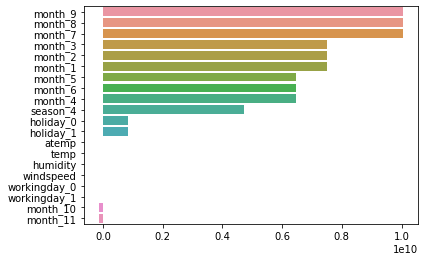

In [10]:
# 선형 회귀 모델별로 평가 수행
lr_reg = LinearRegression()
ridge_reg = Ridge(alpha=10)
lasso_reg = Lasso(alpha=0.01)

for model in [lr_reg, ridge_reg, lasso_reg]:
    get_model_predict(model, X_train, X_test, y_train, y_test, is_expm1=True)
    
# 회귀 계수 상위 25개 피처 추출
coef = pd.Series(lr_reg.coef_, index=X_features_ohe.columns)
coef_sort = coef.sort_values(ascending=False)[:20]
sns.barplot(x=coef_sort.values, y=coef_sort.index)

In [11]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 회귀 트리 모델별로 평가 수행
rf_reg = RandomForestRegressor(n_estimators=500)
gbm_reg = GradientBoostingRegressor(n_estimators=500)
xgb_reg = XGBRegressor(n_estimators=500)
lgbm_reg = LGBMRegressor(n_estimators=500)

for model in [rf_reg, gbm_reg, xgb_reg, lgbm_reg]:
    # XGBoost의 경우 df가 입력되면 오류가 발생할 수 있으므로, ndarray로 변환
    get_model_predict(model, X_train.values, X_test.values, y_train.values, y_test.values, is_expm1=True)

###  RandomForestRegressor  ###
RMSLE: 0.355
###  GradientBoostingRegressor  ###
RMSLE: 0.330
###  XGBRegressor  ###
RMSLE: 0.342
###  LGBMRegressor  ###
RMSLE: 0.319


## 1.10 회귀 실습 - 캐글 주택 가격: 고급 회귀 기법

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_org = pd.read_csv('./data/house-prices-advanced-regression-techniques/train.csv')
df = df_org.copy()
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [2]:
print('데이터 세트의 Shape: ', df.shape)
print('전체 피처의 type\n', df.dtypes.value_counts())
isnull_series = df.isnull().sum()
print('\nNull 칼럼과 그 건수\n', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape:  (1460, 81)
전체 피처의 type
 object     43
int64      35
float64     3
dtype: int64

Null 칼럼과 그 건수
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


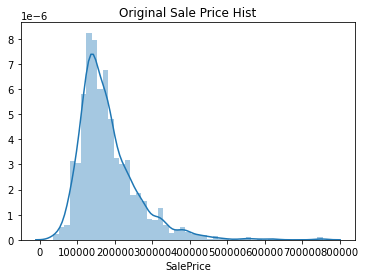

In [3]:
# Target 값의 분포 확인
plt.title('Original Sale Price Hist')
sns.distplot(df['SalePrice'])

In [4]:
# 정규 분포 형태로 변환하기 위해 로그 변환 적용
org_SalePrice = df['SalePrice']
df['SalePrice'] = np.log1p(df['SalePrice'])

# Null이 많은 칼럼과 불필요한 칼럼 삭제
df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

# 드롭하지 않는 숫자형 Null 칼럼은 평균값으로 대체
df.fillna(df.mean(), inplace=True)

# Null 값이 있는 피처명과 타입 추출
null_column_count = df.isnull().sum()[df.isnull().sum() > 0]
print(df.dtypes[null_column_count.index])

MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


문자형 피처를 제외하고는 Null 값이 없음

In [5]:
# 문자형 피처를 원-핫 인코딩으로 변환 (자동으로 Null 값을 None 칼럼으로 대체)
print('수행 전 데이터 Shape: ', df.shape)
df_ohe = pd.get_dummies(df)
print('수행 후 데이터 Shape: ', df_ohe.shape)

null_column_count = df_ohe.isnull().sum()[df_ohe.isnull().sum() > 0]
print(df_ohe.dtypes[null_column_count.index])

수행 전 데이터 Shape:  (1460, 75)
수행 후 데이터 Shape:  (1460, 271)
Series([], dtype: object)


### 1.10.1 선형 회귀 모델 학습/예측/평가

Target 값과 예측값이 로그 변환되었으므로 예측 결과 오류에 RMSE를 적용하면 RMSLE가 자동으로 측정

In [6]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    print(model.__class__.__name__, ' 로그 변환된 RMSE: ', np.round(rmse, 3))
    return rmse

# get_rmse()를 이용해 여러 모델의 RMSE 값 반환하는 함수
def get_rmses(models):
    rmses = []
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = df_ohe['SalePrice']
X_features = df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression  로그 변환된 RMSE:  0.132
Ridge  로그 변환된 RMSE:  0.128
Lasso  로그 변환된 RMSE:  0.176


[0.1318957657915436, 0.12750846334053045, 0.17628250556471395]

In [8]:
# 피처의 회귀 계수 시각화 함수
def get_tb_coef(model, n=10):
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    coef_high = coef.sort_values(ascending=False).head(n)
    coef_low = coef.sort_values(ascending=False).tail(n)
    return coef_high, coef_low

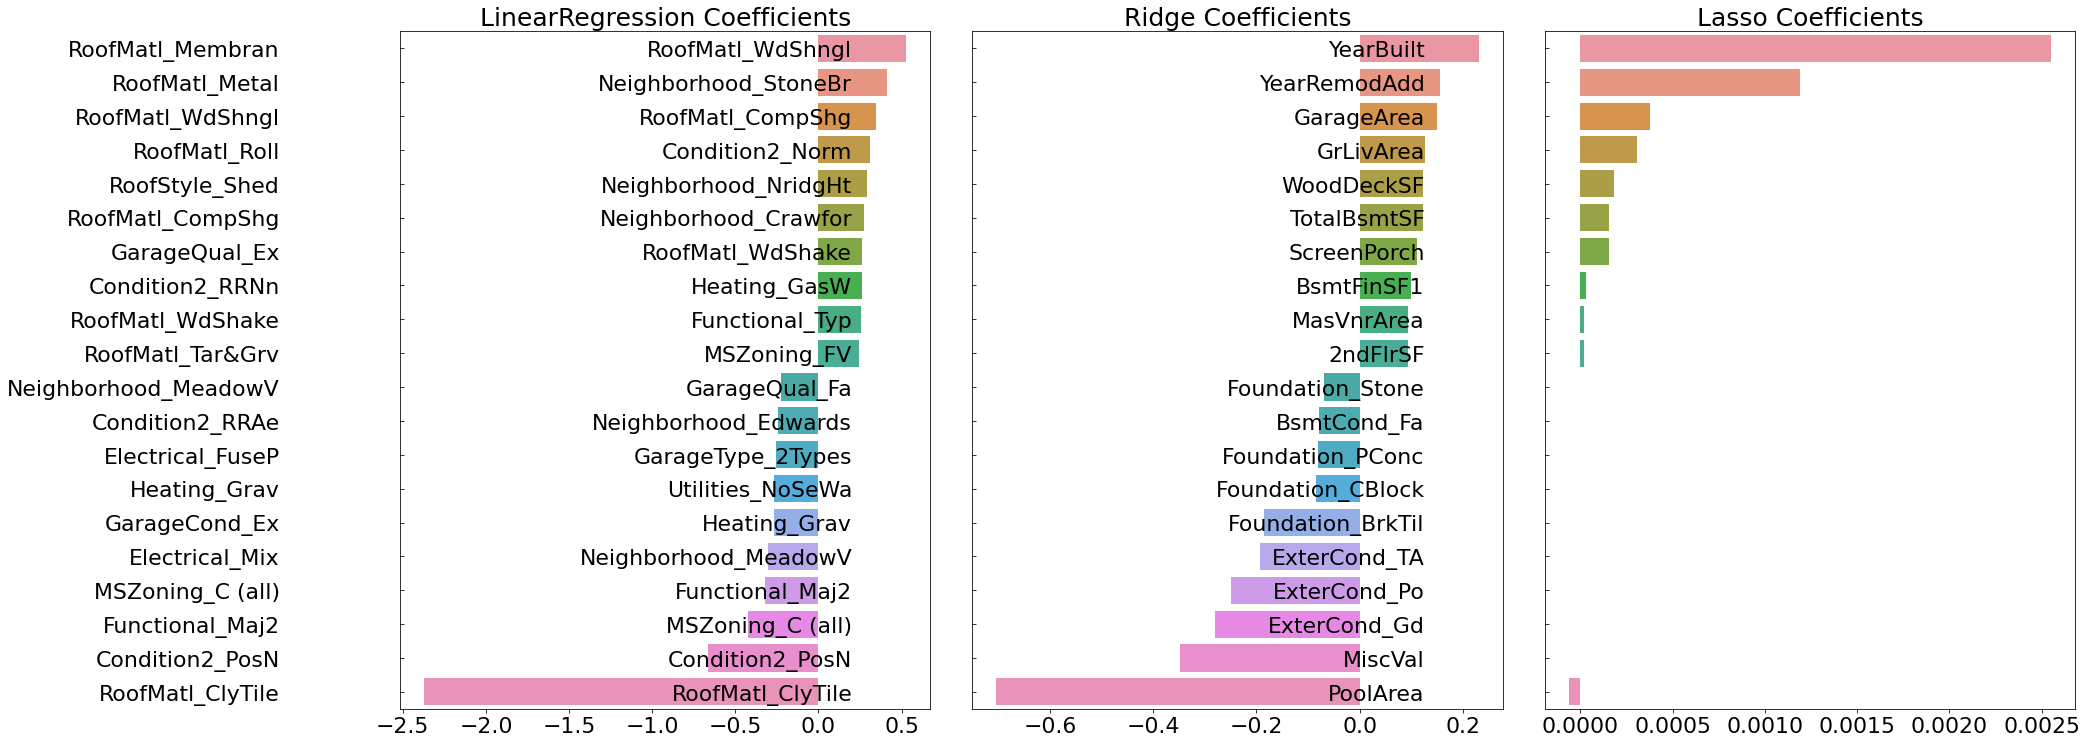

In [9]:
# get_tb_coef()를 이용한 모델별 회귀 계수 시각화 함수
def visualize_coefficient(models):
    fig, axs = plt.subplots(figsize=(24,10), nrows=1, ncols=3)
    fig.tight_layout()
    
    for i, model in enumerate(models):
        coef_high, coef_low = get_tb_coef(model)
        coef_concat = pd.concat([coef_high, coef_low])
        
        axs[i].set_title(model.__class__.__name__+' Coefficients', size=25)
        axs[i].tick_params(axis='y', direction='in', pad=120)
        for label in (axs[i].get_xticklabels() + axs[i].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index, ax=axs[i])
        
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

라쏘의 경우 상대적으로 RMSE 값이 높게 나타났으며, 회귀 계수 값은 매우 작아 나머지 두 개의 모델과 다른 형태를 보이고 있음

학습 데이터의 데이터 분할에 문제가 있어서인지 이번에는 데이터를 **5개의 교차 검증 폴드 세트로 분할**해 평균 RMSE 측정

In [10]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse(models):
    for model in models:
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target, scoring='neg_mean_squared_error', cv=5))
        rmse_avg = np.mean(rmse_list)
        print('\n CV RMSE 값 리스트: {1}'.format(model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format(model.__class__.__name__, np.round(rmse_avg, 3)))
        
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse(models)


 CV RMSE 값 리스트: [0.135 0.165 0.168 0.111 0.198]
LinearRegression CV 평균 RMSE 값: 0.155

 CV RMSE 값 리스트: [0.117 0.154 0.142 0.117 0.189]
Ridge CV 평균 RMSE 값: 0.144

 CV RMSE 값 리스트: [0.161 0.204 0.177 0.181 0.265]
Lasso CV 평균 RMSE 값: 0.198


여전히 라쏘의 성능이 떨어짐. 릿지와 라쏘 모델에 대해 alpha 하이퍼 파라미터를 변화시키면서 최적 값을 도출

In [11]:
from sklearn.model_selection import GridSearchCV

# 최적화 작업의 결과를 표시하는 함수
def best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1 * grid_model.best_score_)
    print('{0} 최적 평균 RMSE 값: {1}, 최적 alpha: {2}'.format(model.__class__.__name__, np.round(rmse, 4), grid_model.best_params_))
    
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_params(ridge_reg, ridge_params)
best_params(lasso_reg, lasso_params)

Ridge 최적 평균 RMSE 값: 0.1418, 최적 alpha: {'alpha': 12}
Lasso 최적 평균 RMSE 값: 0.142, 최적 alpha: {'alpha': 0.001}


라쏘 모델의 경우 alpha 값 최적화 이후 예측 성능이 많이 좋아짐

LinearRegression  로그 변환된 RMSE:  0.132
Ridge  로그 변환된 RMSE:  0.124
Lasso  로그 변환된 RMSE:  0.12


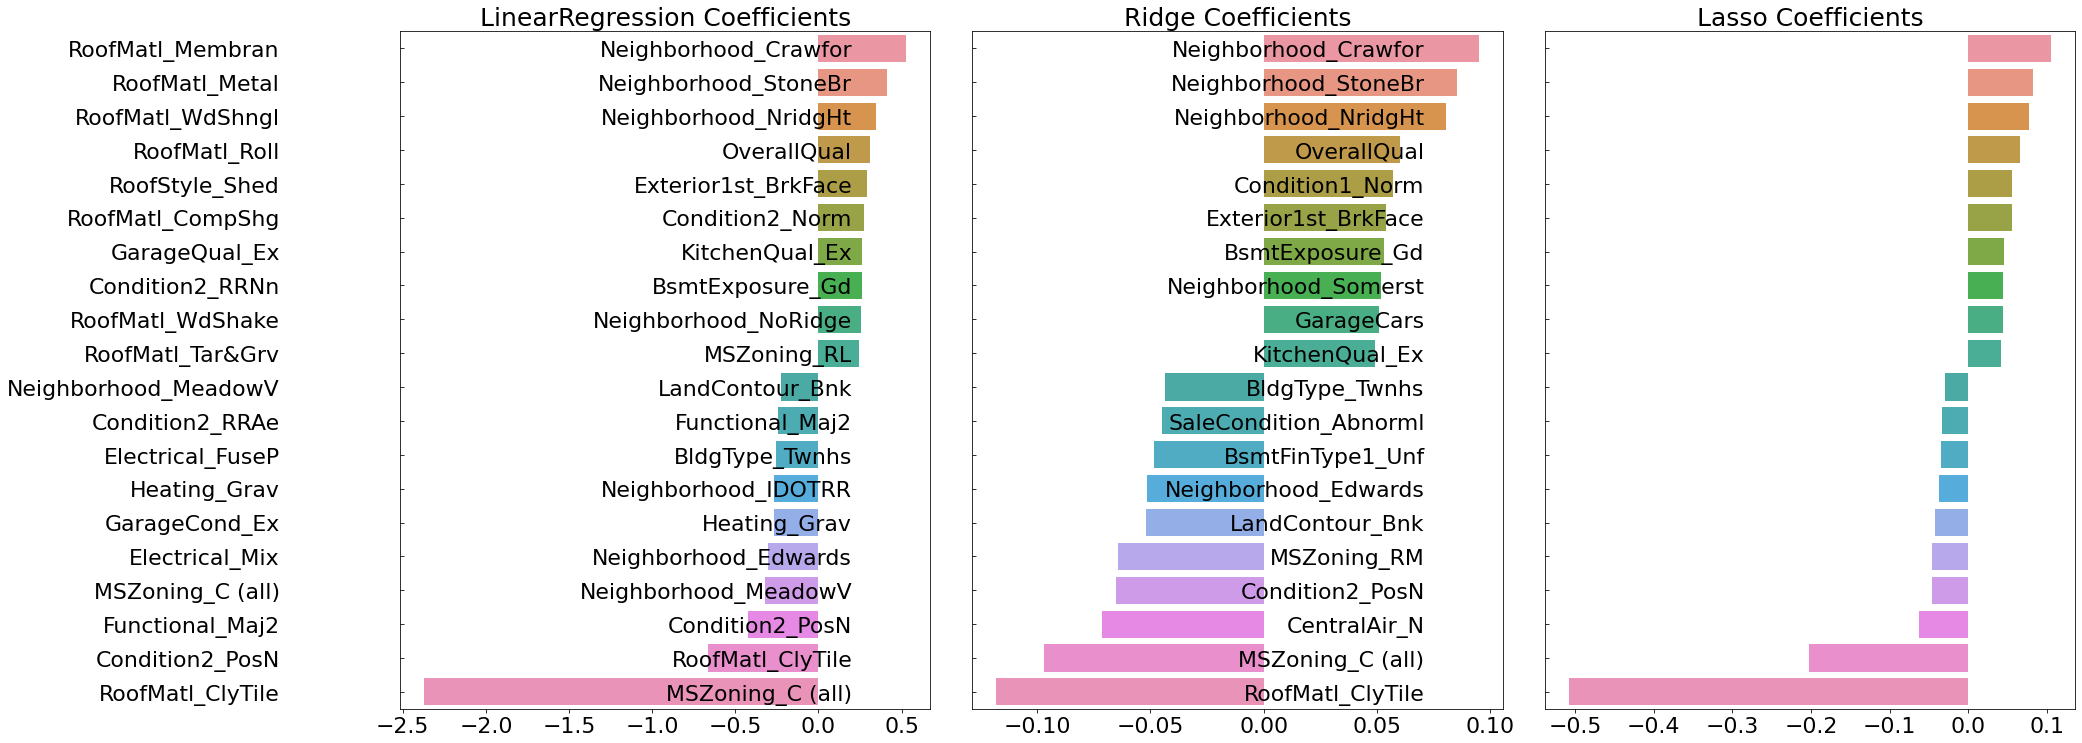

In [12]:
# 최적화 alpha 값을 적용하여 학습 및 예측, 평가
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
visualize_coefficient(models)

데이터 세트를 추가적으로 가공하여 모델 튜닝 진행 -> **피처 데이터 세트의 데이터 분포도 확인 후 이상치 데이터 처리**

In [13]:
from scipy.stats import skew

features_index = df.dtypes[df.dtypes != 'object'].index
skew_features = df[features_index].apply(lambda x : skew(x))

# skew(왜곡) 정도가 1 이상인 칼럼만 추출
skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64


In [14]:
# 왜도가 높은 피처 로그 변환
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [15]:
# 다시 원-핫 인코딩을 적용하고 피처/타깃 데이터 세트 생성
df_ohe = pd.get_dummies(df)
y_target = df_ohe['SalePrice']
X_features = df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

# 다시 최적 하이퍼 파라미터와 RMSE 출력
ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_params(ridge_reg, ridge_params)
best_params(lasso_reg, lasso_params)

Ridge 최적 평균 RMSE 값: 0.1275, 최적 alpha: {'alpha': 10}
Lasso 최적 평균 RMSE 값: 0.1252, 최적 alpha: {'alpha': 0.001}


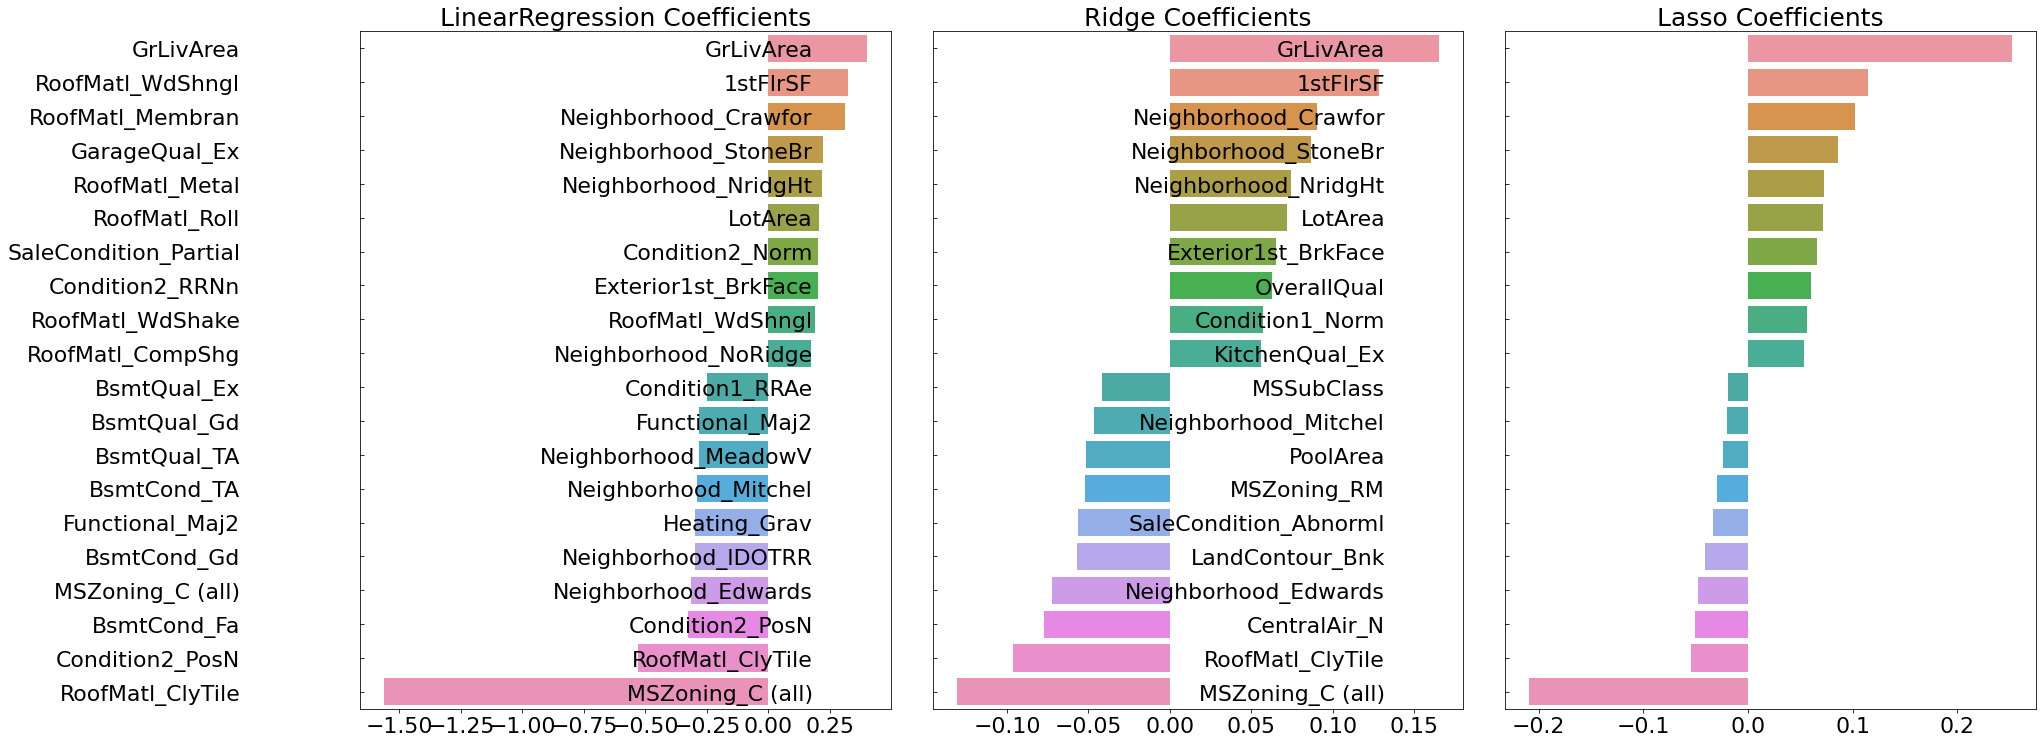

In [16]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=10)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

세 모델 모두 회귀 계수가 가장 높은 피처로 주거 공간 크기(GrLivArea)가 선정됨

예측에 많은 영향을 미치는 피처의 이상치 데이터 처리는 중요하므로, GrLivArea 피처의 데이터 분포 확인

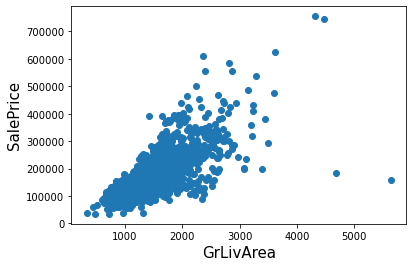

In [17]:
# GrLivArea와 SalePrice의 관계를 시각화하여 이상치 확인
plt.scatter(x=df_org['GrLivArea'], y=df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

양의 상관관계가 있음을 알 수 있으며, GrLivArea가 4000평방피트 이상임에도 가격이 500,000 달러 이하인 데이터를 이상치로 간주하고 삭제

In [18]:
con1 = df_ohe['GrLivArea'] > np.log1p(4000)
con2 = df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = df_ohe[con1 & con2].index
df_ohe.drop(outlier_index, axis=0, inplace=True)

In [19]:
y_target = df_ohe['SalePrice']
X_features = df_ohe.drop('SalePrice', axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = {'alpha': [0.05, 0.1, 1, 5, 8, 10, 12, 15, 20]}
lasso_params = {'alpha': [0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1, 5, 10]}
best_params(ridge_reg, ridge_params)
best_params(lasso_reg, lasso_params)

Ridge 최적 평균 RMSE 값: 0.1125, 최적 alpha: {'alpha': 8}
Lasso 최적 평균 RMSE 값: 0.1122, 최적 alpha: {'alpha': 0.001}


LinearRegression  로그 변환된 RMSE:  0.129
Ridge  로그 변환된 RMSE:  0.103
Lasso  로그 변환된 RMSE:  0.1


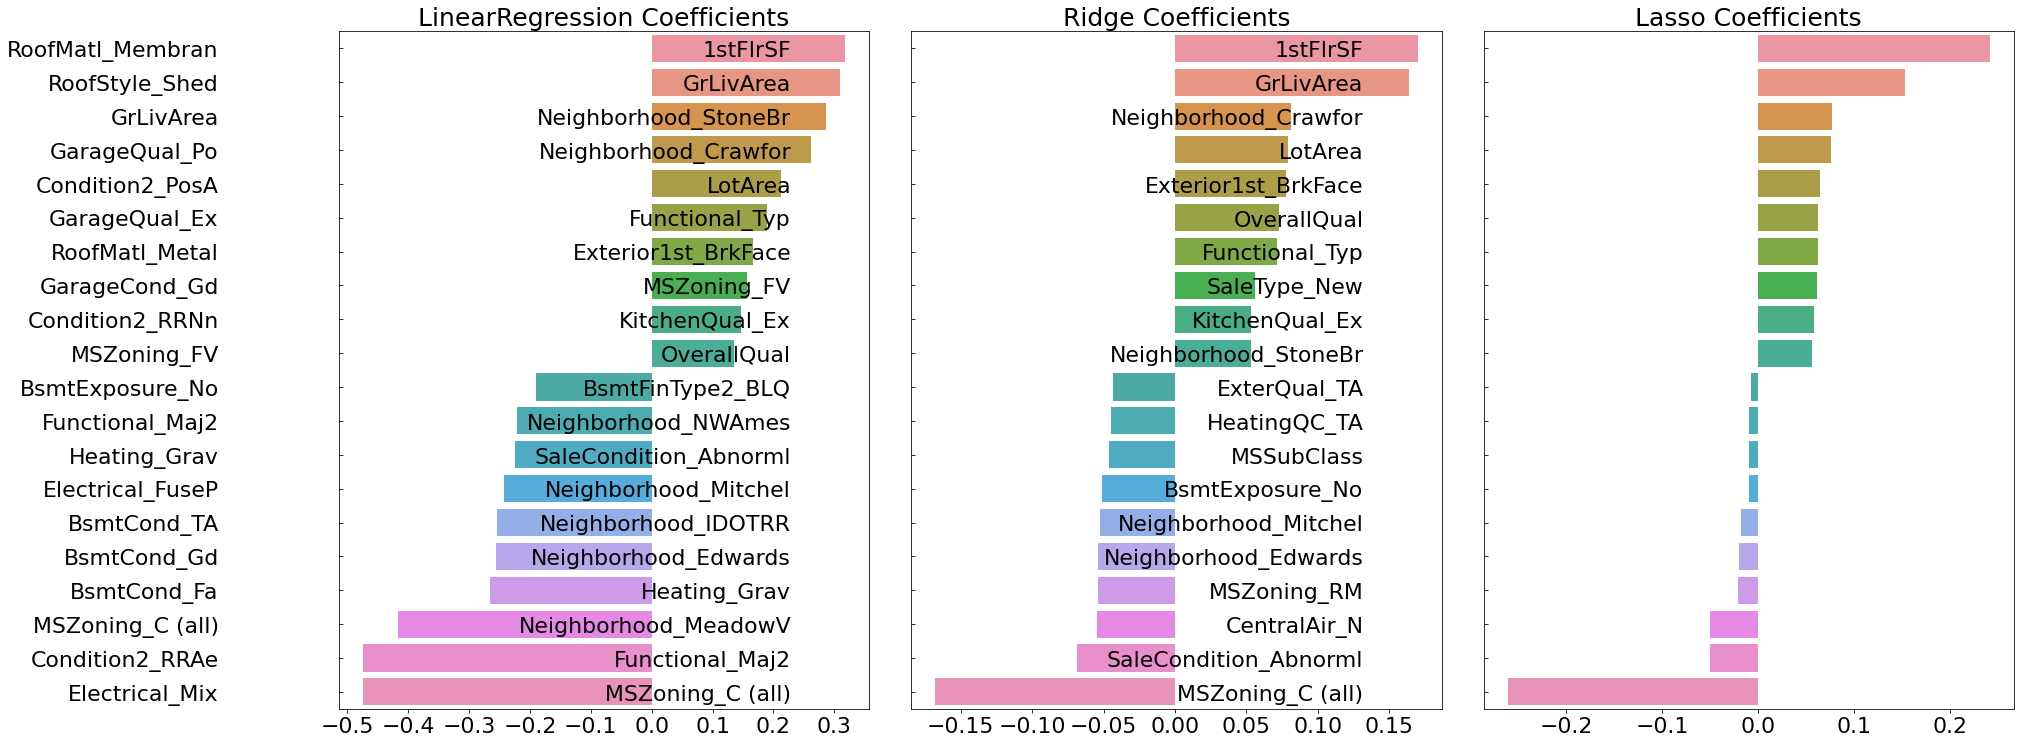

In [20]:
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)
visualize_coefficient(models)

### 1.10.2 회귀 트리 모델 학습/예측/평가

In [21]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators': [1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
best_params(xgb_reg, xgb_params)

XGBRegressor 최적 평균 RMSE 값: 0.1178, 최적 alpha: {'n_estimators': 1000}


In [22]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,\
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_params(lgbm_reg, lgbm_params)

LGBMRegressor 최적 평균 RMSE 값: 0.1163, 최적 alpha: {'n_estimators': 1000}


### 1.10.3 회귀 모델의 예측 결과 혼합을 통한 최종 예측

In [23]:
# 최종 혼합 모델, 개별 모델의 RMSE 값을 출력하는 함수
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test, pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))

ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)

# 개별 모델 예측값 혼합으로 최종 예측값 도출
pred = 0.4 * ridge_pred + 0.6 *lasso_pred
preds = {'최종 혼합': pred, 'Ridge': ridge_pred, 'Lasso': lasso_pred}
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.10007930884470519
Ridge 모델의 RMSE: 0.10345177546603272
Lasso 모델의 RMSE: 0.10024170460890039


In [24]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4,\
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)

xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred, 'XGBM': xgb_pred, 'LGBM': lgbm_pred}
get_rmse_pred(preds)

최종 혼합 모델의 RMSE: 0.1017007808403327
XGBM 모델의 RMSE: 0.10738299364833828
LGBM 모델의 RMSE: 0.10382510019327311


### 1.10.4 스태킹 앙상블 모델을 통한 회귀 예측

스태킹 모델은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용, 테스트용 피처 데이터 세트를 만드는 것이 핵심

In [25]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습/테스트 데이터를 생성하는 함수
def get_stacking_data(model, X_train_n, y_train_n, X_test_n, n_folds):
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__, ' model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ', folder_counter, ' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장
        test_pred[:, folder_counter] = model.predict(X_test_n)
        
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    # 최종 메타 모델이 사용하는 학습/테스트 데이터
    return train_fold_pred, test_pred_mean

In [26]:
# get_stacking_data()는 넘파이 ndarray를 인자로 사용하므로 df를 넘파이로 변환
X_train_n = X_train.values
y_train_n = y_train.values
X_test_n = X_test.values

ridge_train, ridge_test = get_stacking_data(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_data(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_data(xgb_reg, X_train_n, y_train_n, X_test_n, 5)
lgbm_train, lgbm_test = get_stacking_data(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 


In [27]:
# 개별 모델이 반환한 학습/테스트 데이터 세트를 스태킹 형태로 결합
stack_X_train = np.concatenate((ridge_train, lasso_train, xgb_train, lgbm_train), axis=1)
stack_X_test = np.concatenate((ridge_test, lasso_test, xgb_test, lgbm_test), axis=1)

# 최종 메타 모델은 라쏘 모델 적용
meta_model = Lasso(alpha=0.0005)
meta_model.fit(stack_X_train, y_train)
final = meta_model.predict(stack_X_test)
mse = mean_squared_error(y_test, final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값: ', rmse)

스태킹 회귀 모델의 최종 RMSE 값:  0.0979915406689774


최종적으로 스태킹 회귀 모델을 적용한 결과, 현재까지 가장 좋은 성능 평가를 보임